# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/11_tensor_operations_einsum`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/11_tensor_operations_einsum/02_advanced_einsum.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# Advanced Tensor Operations with Einstein Notation

In this notebook, we'll explore more advanced tensor operations using Einstein notation. Building on the fundamentals covered in the introduction, we'll dive into complex operations that demonstrate the power and flexibility of Einstein notation for tensor algebra.

We'll cover:
1. Advanced tensor contractions
2. Batch operations with tensors
3. Tensor reshaping and dimension manipulation
4. Optimizing tensor operations
5. Real-world examples of einsum usage


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Set the style for plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Helper function to display tensors as heatmaps
def plot_tensor_heatmap(tensor, title, is_3d=False):
    if is_3d:
        fig, axes = plt.subplots(1, tensor.shape[0], figsize=(15, 5))
        for i in range(tensor.shape[0]):
            im = axes[i].imshow(tensor[i].numpy(), cmap='Blues')
            axes[i].set_title(f'Slice {i}')
            plt.colorbar(im, ax=axes[i])
        fig.suptitle(title, fontsize=16)
    else:
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(tensor.numpy(), annot=True, cmap='Blues', fmt=".1f",
                cbar_kws={'label': 'Value'})
        plt.title(title)
    plt.tight_layout()
    plt.show()


## Advanced Tensor Contractions

Tensor contraction is the generalization of matrix multiplication to higher-order tensors. When we contract tensors, we sum over one or more pairs of indices.

Let's start with some examples:


Tensor A shape: torch.Size([2, 3])
Tensor B shape: torch.Size([2, 3, 2])


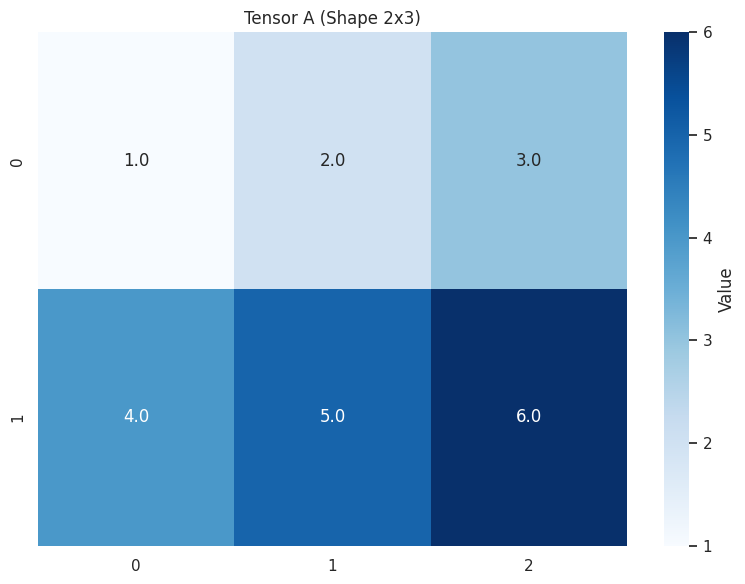

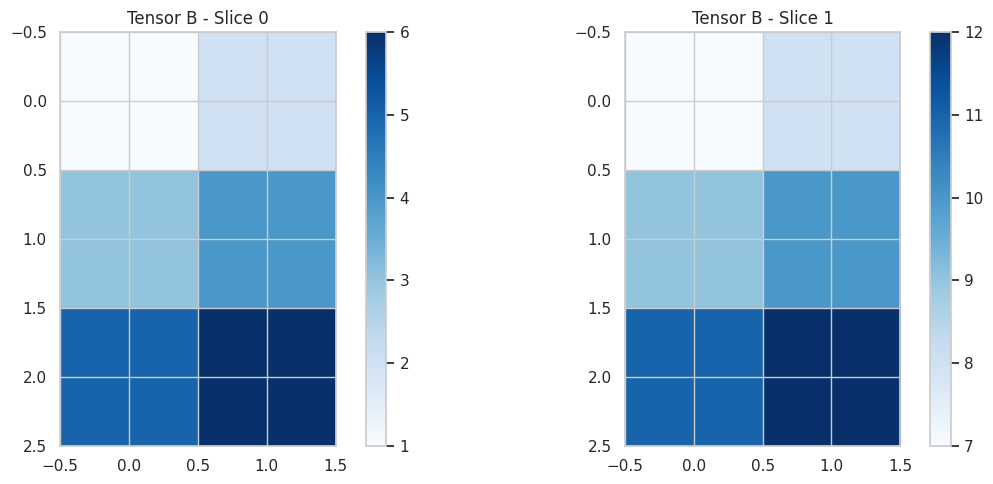

In [2]:
# Create some tensors for our examples
A = torch.tensor([[1, 2, 3], 
                 [4, 5, 6]], dtype=torch.float32)  # Shape (2, 3)

B = torch.tensor([[[1, 2], [3, 4], [5, 6]], 
                 [[7, 8], [9, 10], [11, 12]]], dtype=torch.float32)  # Shape (2, 3, 2)

# Print shapes
print("Tensor A shape:", A.shape)
print("Tensor B shape:", B.shape)

# Visualize the tensors
plot_tensor_heatmap(A, "Tensor A (Shape 2x3)")

# For the 3D tensor, plot each slice
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i in range(B.shape[0]):
    im = axes[i].imshow(B[i].numpy(), cmap='Blues')
    axes[i].set_title(f'Tensor B - Slice {i}')
    plt.colorbar(im, ax=axes[i])
plt.tight_layout()
plt.show()


### Example 1: Contracting a 2D Tensor with a 3D Tensor

Let's contract the last dimension of tensor A with the middle dimension of tensor B.
In Einstein notation, this would be: $C_{ik} = A_{ij} B_{jik}$


Traditional result shape: torch.Size([2, 2])
Traditional result:
 tensor([[ 22.,  28.],
        [139., 154.]])

Einsum result shape: torch.Size([2, 2])
Einsum result:
 tensor([[ 22.,  28.],
        [139., 154.]])

Are they equal? True


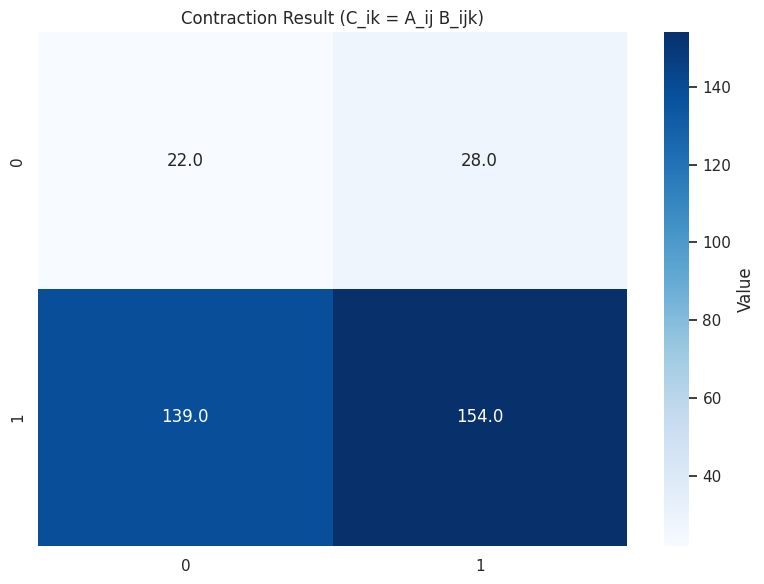

In [3]:
# Traditional approach using loops
C_traditional = torch.zeros((2, 2), dtype=torch.float32)
for i in range(2):
    for j in range(3):
        for k in range(2):
            C_traditional[i, k] += A[i, j] * B[i, j, k]

print("Traditional result shape:", C_traditional.shape)
print("Traditional result:\n", C_traditional)

# Using einsum
C_einsum = torch.einsum('ij,ijk->ik', A, B)
print("\nEinsum result shape:", C_einsum.shape)
print("Einsum result:\n", C_einsum)

# Check if they're the same
print("\nAre they equal?", torch.allclose(C_traditional, C_einsum))

# Visualize result
plot_tensor_heatmap(C_einsum, "Contraction Result (C_ik = A_ij B_ijk)")


### Example 2: Tensor Trace

The trace of a matrix is the sum of its diagonal elements. We can generalize this to higher-order tensors using Einstein notation.

For a 2D tensor, the trace is: $\text{Tr}(A) = A_{ii}$ (summing over repeated index i)


Traditional trace: 15
Einsum trace: 15
Are they equal? tensor(True)


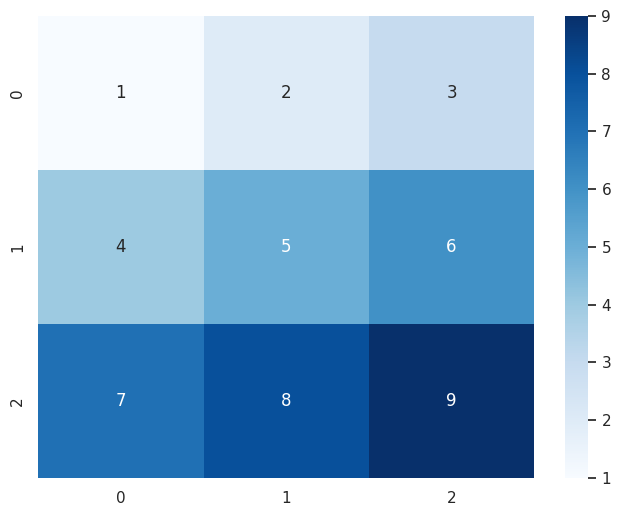

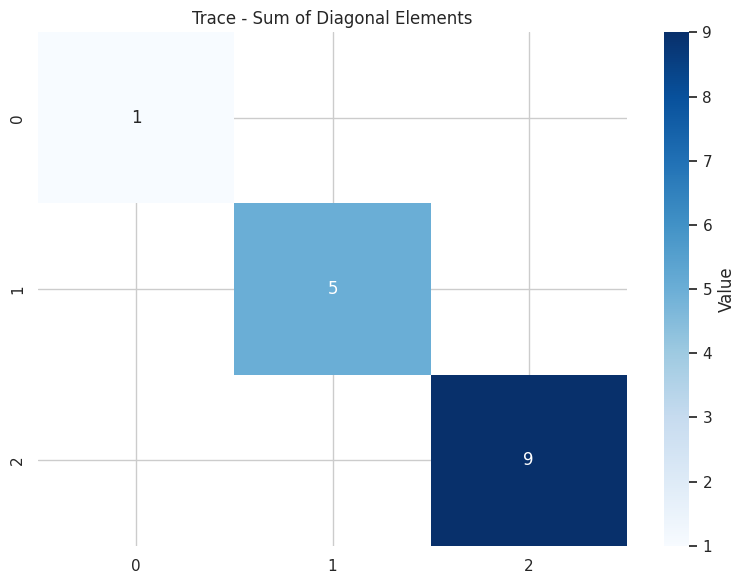

In [4]:
# Create a square tensor
square_tensor = torch.tensor([[1, 2, 3], 
                             [4, 5, 6],
                             [7, 8, 9]])

# Calculate trace using traditional method
trace_traditional = torch.trace(square_tensor)
print("Traditional trace:", trace_traditional.item())

# Calculate trace using einsum
trace_einsum = torch.einsum('ii->', square_tensor)
print("Einsum trace:", trace_einsum.item())

print("Are they equal?", torch.isclose(trace_traditional, trace_einsum))

# Visualize the tensor and highlight the diagonal elements
plt.figure(figsize=(8, 6))
sns.heatmap(square_tensor.numpy(), annot=True, cmap='Blues', fmt=".0f")

# Highlight the diagonal
mask = np.zeros_like(square_tensor.numpy(), dtype=bool)
np.fill_diagonal(mask, True)
plt.figure(figsize=(8, 6))
sns.heatmap(square_tensor.numpy(), annot=True, cmap='Blues', fmt=".0f", 
            mask=~mask, cbar_kws={'label': 'Value'})
plt.title('Trace - Sum of Diagonal Elements')
plt.tight_layout()
plt.show()


### Example 3: Higher-Order Contractions

Let's create a 4D tensor and perform a double contraction.


4D tensor shape: torch.Size([2, 3, 3, 2])


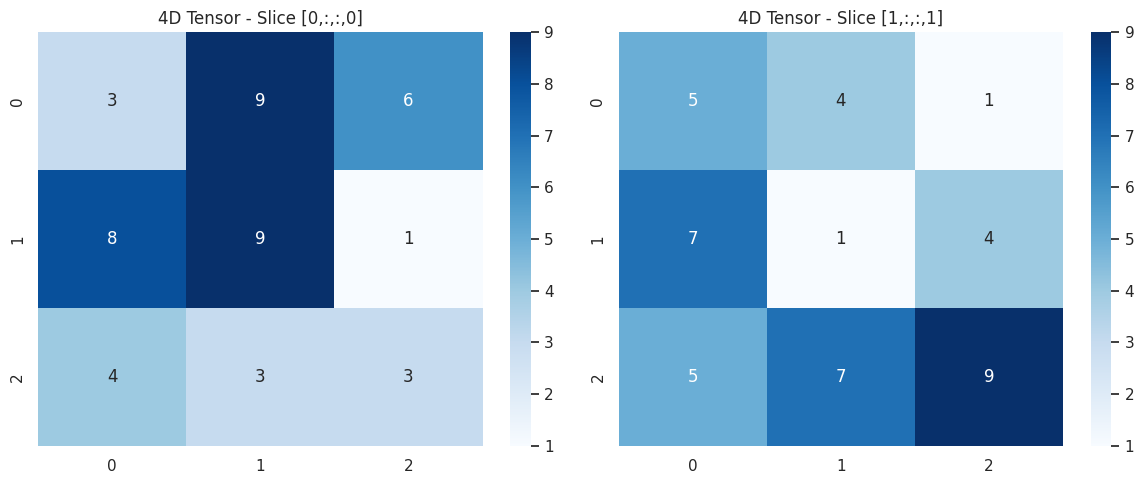

Second 4D tensor shape: torch.Size([3, 2, 4, 5])
Double contraction result shape: torch.Size([2, 3, 4, 5])


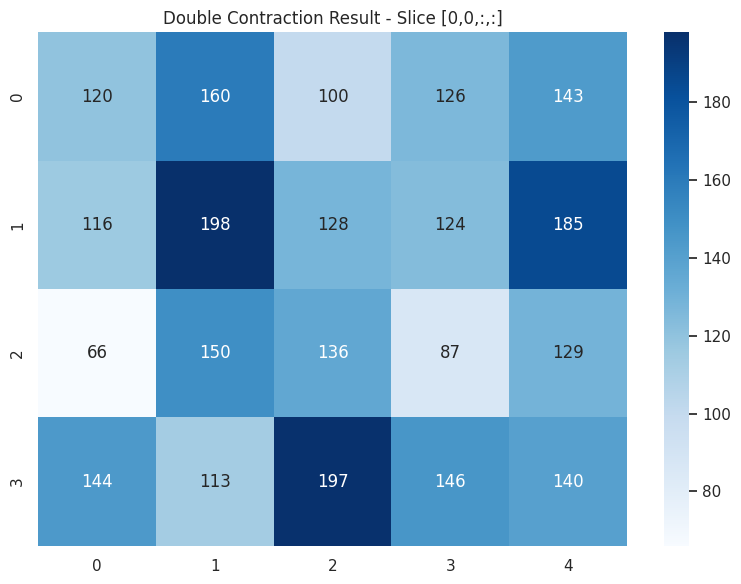

In [5]:
# Create a 4D tensor with shape (2, 3, 3, 2)
tensor_4d = torch.randint(1, 10, (2, 3, 3, 2)).float()
print("4D tensor shape:", tensor_4d.shape)

# Display a slice of the 4D tensor
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.heatmap(tensor_4d[0, :, :, 0].numpy(), annot=True, cmap='Blues', fmt=".0f")
plt.title('4D Tensor - Slice [0,:,:,0]')
plt.subplot(122)
sns.heatmap(tensor_4d[1, :, :, 1].numpy(), annot=True, cmap='Blues', fmt=".0f")
plt.title('4D Tensor - Slice [1,:,:,1]')
plt.tight_layout()
plt.show()

# Create a compatible second tensor
tensor_4d_2 = torch.randint(1, 10, (3, 2, 4, 5)).float()
print("Second 4D tensor shape:", tensor_4d_2.shape)

# Double contraction (contract over the middle two dimensions)
result_double_contraction = torch.einsum('ijkl,klmn->ijmn', tensor_4d, tensor_4d_2)
print("Double contraction result shape:", result_double_contraction.shape)

# Display a slice of the result
plt.figure(figsize=(8, 6))
sns.heatmap(result_double_contraction[0, 0].numpy(), annot=True, cmap='Blues', fmt=".0f")
plt.title('Double Contraction Result - Slice [0,0,:,:]')
plt.tight_layout()
plt.show()


## Batch Operations with Einstein Notation

One of the strengths of einsum is handling batch operations efficiently. Let's explore some examples:


In [6]:
# Create a batch of matrices (batch_size, rows, cols)
batch_size = 5
batch_matrices = torch.randint(1, 10, (batch_size, 3, 4)).float()
print("Batch matrices shape:", batch_matrices.shape)

# Create another batch with compatible dimensions for matrix multiplication
batch_matrices2 = torch.randint(1, 10, (batch_size, 4, 2)).float()
print("Second batch shape:", batch_matrices2.shape)


Batch matrices shape: torch.Size([5, 3, 4])
Second batch shape: torch.Size([5, 4, 2])


### Batch Matrix Multiplication

We can use einsum to perform matrix multiplication on every pair of matrices in the batches:


BMM result shape: torch.Size([5, 3, 2])
Einsum BMM result shape: torch.Size([5, 3, 2])
Are they equal? True

Example from batch (index 0):
Input matrix 1:
 tensor([[2., 4., 5., 5.],
        [1., 7., 2., 4.],
        [4., 6., 6., 1.]])
Input matrix 2:
 tensor([[8., 6.],
        [3., 1.],
        [9., 1.],
        [8., 6.]])
Result matrix:
 tensor([[113.,  51.],
        [ 79.,  39.],
        [112.,  42.]])


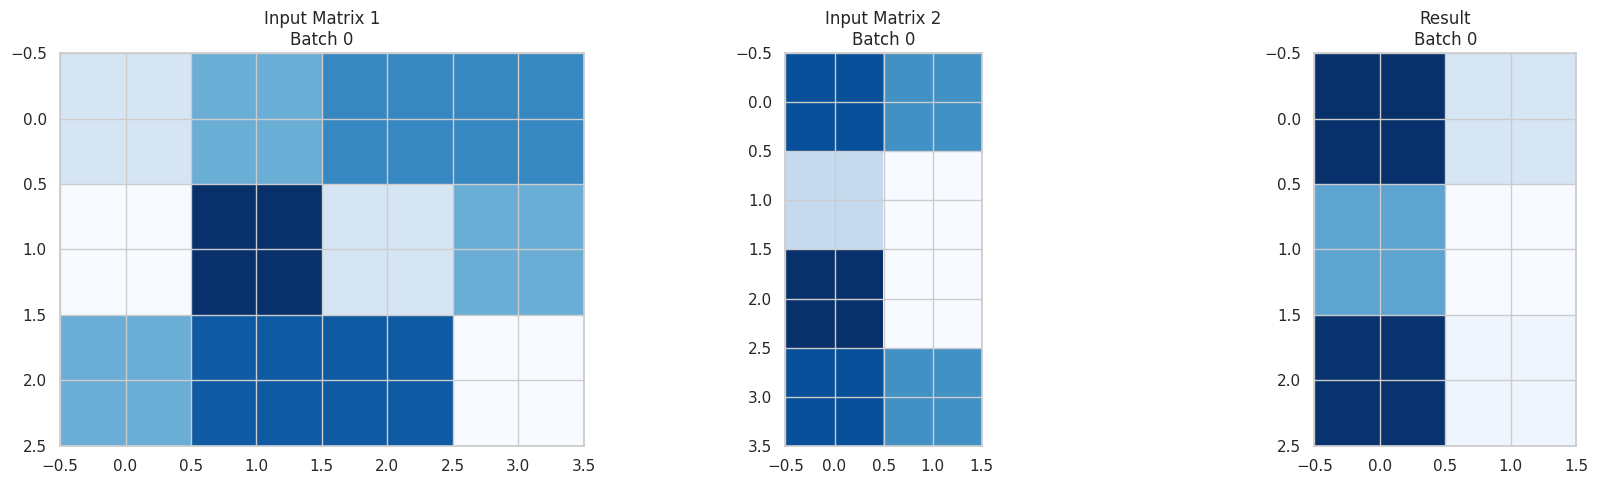

In [7]:
# Traditional batch matmul using torch.bmm
bmm_result = torch.bmm(batch_matrices, batch_matrices2)
print("BMM result shape:", bmm_result.shape)

# Using einsum for batch matrix multiplication
einsum_bmm = torch.einsum('bij,bjk->bik', batch_matrices, batch_matrices2)
print("Einsum BMM result shape:", einsum_bmm.shape)

# Check if they're the same
print("Are they equal?", torch.allclose(bmm_result, einsum_bmm))

# Visualize a single example from the batch
idx = 0  # Choose the first matrix from the batch
print(f"\nExample from batch (index {idx}):")
print("Input matrix 1:\n", batch_matrices[idx])
print("Input matrix 2:\n", batch_matrices2[idx])
print("Result matrix:\n", einsum_bmm[idx])

# Visualize the full batch operation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].imshow(batch_matrices[idx].numpy(), cmap='Blues')
axes[0].set_title(f'Input Matrix 1\nBatch {idx}')
axes[1].imshow(batch_matrices2[idx].numpy(), cmap='Blues')
axes[1].set_title(f'Input Matrix 2\nBatch {idx}')
axes[2].imshow(einsum_bmm[idx].numpy(), cmap='Blues')
axes[2].set_title(f'Result\nBatch {idx}')
plt.tight_layout()
plt.show()


### Batch Diagonal Extraction

We can use einsum to extract diagonals from a batch of matrices:


Batch square matrices shape: torch.Size([5, 3, 3])
Traditional batch diagonal shape: torch.Size([5, 3])
Traditional batch diagonal:
 tensor([[4., 4., 1.],
        [6., 3., 3.],
        [4., 6., 9.],
        [1., 7., 1.],
        [6., 5., 1.]])

Einsum batch diagonal shape: torch.Size([5, 3])
Einsum batch diagonal:
 tensor([[4., 4., 1.],
        [6., 3., 3.],
        [4., 6., 9.],
        [1., 7., 1.],
        [6., 5., 1.]])

Are they equal? True


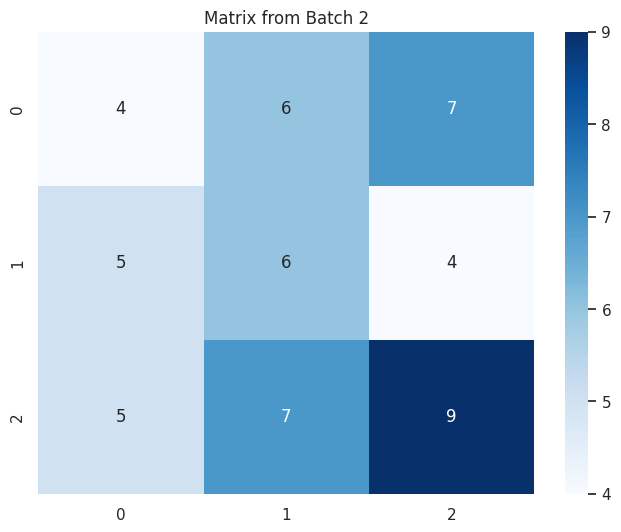

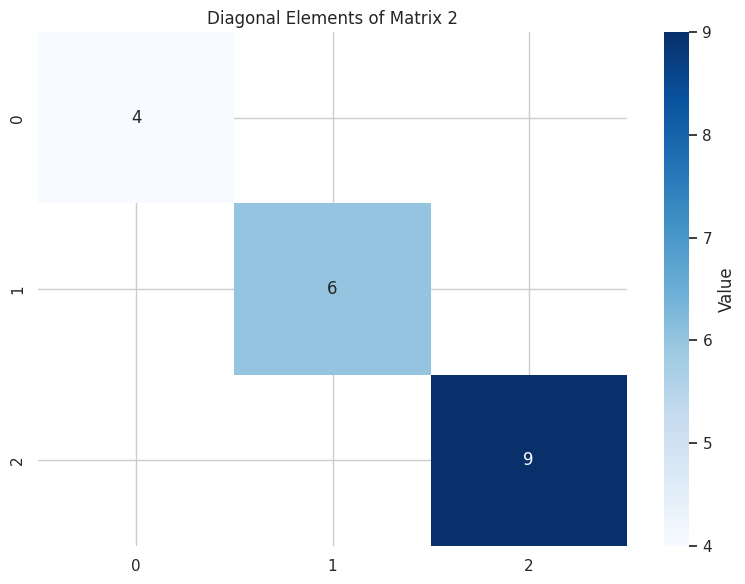

In [8]:
# Create a batch of square matrices
batch_square = torch.randint(1, 10, (batch_size, 3, 3)).float()
print("Batch square matrices shape:", batch_square.shape)

# Extract diagonal for each matrix in the batch
batch_diag_traditional = torch.diagonal(batch_square, dim1=1, dim2=2)
print("Traditional batch diagonal shape:", batch_diag_traditional.shape)
print("Traditional batch diagonal:\n", batch_diag_traditional)

# Using einsum to extract diagonals
batch_diag_einsum = torch.einsum('bii->bi', batch_square)
print("\nEinsum batch diagonal shape:", batch_diag_einsum.shape)
print("Einsum batch diagonal:\n", batch_diag_einsum)

# Check if they're the same
print("\nAre they equal?", torch.allclose(batch_diag_traditional, batch_diag_einsum))

# Visualize diagonal extraction for one matrix in the batch
idx = 2  # Choose third matrix from batch
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(batch_square[idx].numpy(), annot=True, cmap='Blues', fmt=".0f")
plt.title(f'Matrix from Batch {idx}')

# Highlight the diagonal
mask = np.zeros_like(batch_square[idx].numpy(), dtype=bool)
np.fill_diagonal(mask, True)
plt.figure(figsize=(8, 6))
sns.heatmap(batch_square[idx].numpy(), annot=True, cmap='Blues', fmt=".0f", 
            mask=~mask, cbar_kws={'label': 'Value'})
plt.title(f'Diagonal Elements of Matrix {idx}')
plt.tight_layout()
plt.show()


## Tensor Reshaping with Einstein Notation

Einstein notation can also help with tensor reshaping operations. While PyTorch has dedicated functions like `view` and `permute`, einsum can combine reshaping with computation in a single operation.


In [9]:
# Create a 3D tensor
tensor_3d = torch.tensor([[[1, 2], [3, 4]], 
                         [[5, 6], [7, 8]]])  # Shape (2, 2, 2)
print("3D tensor shape:", tensor_3d.shape)
print("3D tensor:\n", tensor_3d)

# Traditional transpose using permute
transpose_trad = tensor_3d.permute(2, 0, 1)
print("\nTransposed tensor using permute, shape:", transpose_trad.shape)
print("Transposed tensor:\n", transpose_trad)

# Using einsum to transpose
transpose_einsum = torch.einsum('ijk->kij', tensor_3d)
print("\nTransposed tensor using einsum, shape:", transpose_einsum.shape)
print("Transposed tensor:\n", transpose_einsum)

# Check if they're the same
print("\nAre they equal?", torch.allclose(transpose_trad, transpose_einsum))


3D tensor shape: torch.Size([2, 2, 2])
3D tensor:
 tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

Transposed tensor using permute, shape: torch.Size([2, 2, 2])
Transposed tensor:
 tensor([[[1, 3],
         [5, 7]],

        [[2, 4],
         [6, 8]]])

Transposed tensor using einsum, shape: torch.Size([2, 2, 2])
Transposed tensor:
 tensor([[[1, 3],
         [5, 7]],

        [[2, 4],
         [6, 8]]])

Are they equal? True


### Flattening Dimensions

We can use einsum to flatten specific dimensions of a tensor:


Original tensor shape: torch.Size([2, 2, 3])
Traditional flatten shape: torch.Size([2, 6])
Traditional flatten:
 tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]])

View flatten shape: torch.Size([2, 6])
View flatten:
 tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]])

Are they equal? True


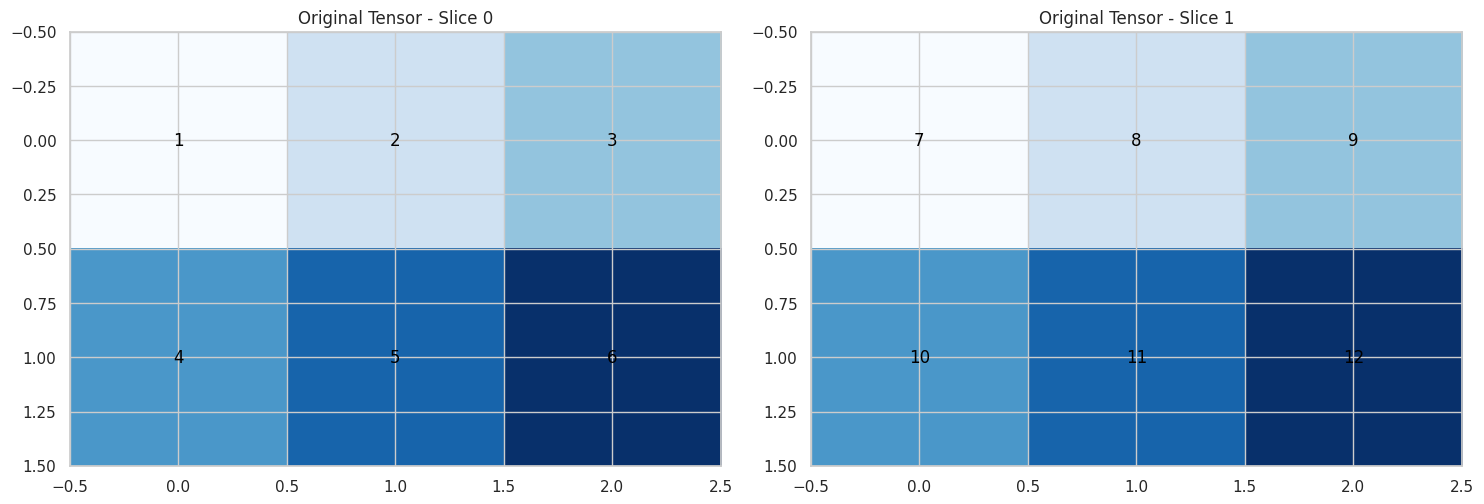

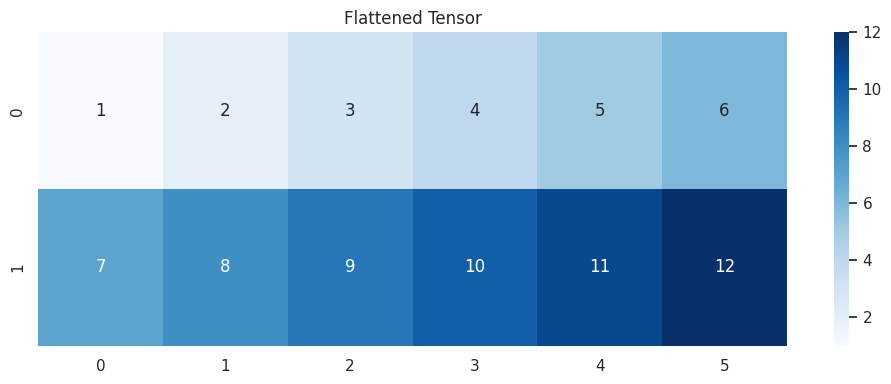

In [10]:
# Create a 3D tensor
tensor_3d = torch.tensor([[[1, 2, 3], [4, 5, 6]], 
                        [[7, 8, 9], [10, 11, 12]]])  # Shape (2, 2, 3)
print("Original tensor shape:", tensor_3d.shape)

# Flatten last two dimensions using traditional method
flatten_trad = tensor_3d.reshape(2, -1)
print("Traditional flatten shape:", flatten_trad.shape)
print("Traditional flatten:\n", flatten_trad)

# Using view operation as alternative
flatten_view = tensor_3d.view(2, -1)
print("\nView flatten shape:", flatten_view.shape)
print("View flatten:\n", flatten_view)

print("\nAre they equal?", torch.allclose(flatten_trad, flatten_view))

# Visualize the flattening process
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original 3D tensor visualization (2 slices)
for i in range(tensor_3d.shape[0]):
    axes[i].imshow(tensor_3d[i].numpy(), cmap='Blues')
    axes[i].set_title(f'Original Tensor - Slice {i}')
    
    # Add text annotations
    for j in range(tensor_3d.shape[1]):
        for k in range(tensor_3d.shape[2]):
            axes[i].text(k, j, f'{tensor_3d[i,j,k].item():.0f}', 
                      ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

# Flattened 2D tensor visualization
plt.figure(figsize=(10, 4))
sns.heatmap(flatten_view.numpy(), annot=True, cmap='Blues', fmt=".0f")
plt.title('Flattened Tensor')
plt.tight_layout()
plt.show()


## Optimizing Tensor Operations with Einstein Notation

One advantage of using einsum is that operations can be more efficient than chaining multiple operations. Let's compare the performance of traditional methods versus einsum:


In [11]:
# Create large tensors for performance testing
n = 100
A = torch.randn(n, n)
B = torch.randn(n, n)
C = torch.randn(n, n)

# Measure time for traditional matrix chain multiplication
start_time = time.time()
result_traditional = torch.matmul(torch.matmul(A, B), C)
traditional_time = time.time() - start_time

# Measure time for einsum
start_time = time.time()
result_einsum = torch.einsum('ij,jk,kl->il', A, B, C)
einsum_time = time.time() - start_time

print(f"Traditional chain multiplication time: {traditional_time:.6f} seconds")
print(f"Einsum time: {einsum_time:.6f} seconds")
print(f"Speedup: {traditional_time / einsum_time:.2f}x")
print("Are results equal?", torch.allclose(result_traditional, result_einsum, rtol=1e-5))


Traditional chain multiplication time: 0.000328 seconds
Einsum time: 0.000323 seconds
Speedup: 1.01x
Are results equal? True


Let's benchmark a few more operations to compare performance:


In [12]:
# Create tensors for benchmarking
batch_size = 32
A = torch.randn(batch_size, 50, 50)
B = torch.randn(batch_size, 50, 50)

# 1. Batch diagonal extraction
start_time = time.time()
for _ in range(100):
    diag_trad = torch.diagonal(A, dim1=1, dim2=2)
trad_diag_time = time.time() - start_time

start_time = time.time()
for _ in range(100):
    diag_einsum = torch.einsum('bii->bi', A)
einsum_diag_time = time.time() - start_time

print("Diagonal extraction:")
print(f"Traditional time: {trad_diag_time:.6f} seconds")
print(f"Einsum time: {einsum_diag_time:.6f} seconds")
print(f"Ratio: {trad_diag_time / einsum_diag_time:.2f}x")
print()

# 2. Batch matrix multiplication
start_time = time.time()
for _ in range(100):
    result_bmm = torch.bmm(A, B)
bmm_time = time.time() - start_time

start_time = time.time()
for _ in range(100):
    result_einsum = torch.einsum('bij,bjk->bik', A, B)
einsum_bmm_time = time.time() - start_time

print("Batch matrix multiplication:")
print(f"torch.bmm time: {bmm_time:.6f} seconds")
print(f"Einsum time: {einsum_bmm_time:.6f} seconds")
print(f"Ratio: {bmm_time / einsum_bmm_time:.2f}x")


Diagonal extraction:
Traditional time: 0.000339 seconds
Einsum time: 0.001076 seconds
Ratio: 0.32x

Batch matrix multiplication:
torch.bmm time: 0.015691 seconds
Einsum time: 0.016873 seconds
Ratio: 0.93x


## Real-World Examples of Einstein Notation

Now let's explore some real-world applications where Einstein notation is particularly useful.


### Example 1: Attention Mechanism in Transformers

Attention mechanisms in transformers involve multiple matrix multiplications. Let's implement a simplified self-attention calculation:


In [13]:
# Define tensor dimensions
batch_size = 2
seq_len = 4
d_model = 8
num_heads = 2
d_head = d_model // num_heads

# Create query, key, and value tensors
# Shape: (batch_size, seq_len, d_model)
queries = torch.randn(batch_size, seq_len, d_model)
keys = torch.randn(batch_size, seq_len, d_model)
values = torch.randn(batch_size, seq_len, d_model)

# Reshape to (batch_size, num_heads, seq_len, d_head)
q_reshaped = queries.view(batch_size, seq_len, num_heads, d_head).transpose(1, 2)
k_reshaped = keys.view(batch_size, seq_len, num_heads, d_head).transpose(1, 2)
v_reshaped = values.view(batch_size, seq_len, num_heads, d_head).transpose(1, 2)

print("Q reshaped shape:", q_reshaped.shape)
print("K reshaped shape:", k_reshaped.shape)
print("V reshaped shape:", v_reshaped.shape)

# Calculate attention scores traditional way
# Shape: (batch_size, num_heads, seq_len, seq_len)
scores = torch.matmul(q_reshaped, k_reshaped.transpose(-2, -1)) / (d_head ** 0.5)
print("Attention scores shape:", scores.shape)

# Apply softmax
attn_weights = torch.softmax(scores, dim=-1)
print("Attention weights shape:", attn_weights.shape)

# Apply attention weights to values
# Shape: (batch_size, num_heads, seq_len, d_head)
attn_output_trad = torch.matmul(attn_weights, v_reshaped)
print("Attention output shape:", attn_output_trad.shape)

# Reshape back to (batch_size, seq_len, d_model)
attn_output_trad = attn_output_trad.transpose(1, 2).contiguous().view(batch_size, seq_len, d_model)
print("Final output shape:", attn_output_trad.shape)


Q reshaped shape: torch.Size([2, 2, 4, 4])
K reshaped shape: torch.Size([2, 2, 4, 4])
V reshaped shape: torch.Size([2, 2, 4, 4])
Attention scores shape: torch.Size([2, 2, 4, 4])
Attention weights shape: torch.Size([2, 2, 4, 4])
Attention output shape: torch.Size([2, 2, 4, 4])
Final output shape: torch.Size([2, 4, 8])


Now let's implement the same operation using einsum:


Einsum scores shape: torch.Size([2, 2, 4, 4])
Einsum attention output shape: torch.Size([2, 2, 4, 4])
Einsum final output shape: torch.Size([2, 4, 8])
Results match? True


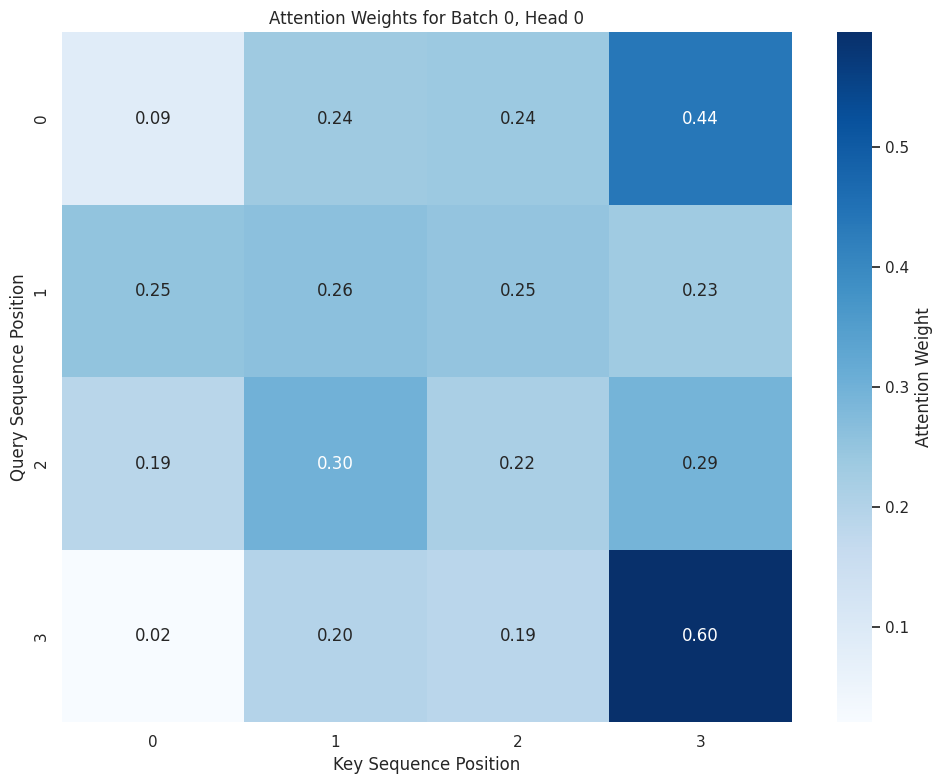

In [14]:
# Einsum approach for self-attention
# 1. Calculate attention scores
# b=batch, h=head, s/t=sequence, d=dimension
scores_einsum = torch.einsum('bhsd,bhtd->bhst', q_reshaped, k_reshaped) / (d_head ** 0.5)
print("Einsum scores shape:", scores_einsum.shape)

# Apply softmax (no einsum equivalent)
attn_weights_einsum = torch.softmax(scores_einsum, dim=-1)

# 2. Apply attention weights to values
attn_output_einsum = torch.einsum('bhst,bhtd->bhsd', attn_weights_einsum, v_reshaped)
print("Einsum attention output shape:", attn_output_einsum.shape)

# 3. Reshape back (could use einsum, but view is clearer)
attn_output_einsum = attn_output_einsum.transpose(1, 2).contiguous().view(batch_size, seq_len, d_model)
print("Einsum final output shape:", attn_output_einsum.shape)

# Check if results match
print("Results match?", torch.allclose(attn_output_trad, attn_output_einsum, rtol=1e-5))

# Visualize attention weights for one head
plt.figure(figsize=(10, 8))
sns.heatmap(attn_weights[0, 0].detach().numpy(), annot=True, cmap='Blues', fmt=".2f", 
            cbar_kws={'label': 'Attention Weight'})
plt.title('Attention Weights for Batch 0, Head 0')
plt.xlabel('Key Sequence Position')
plt.ylabel('Query Sequence Position')
plt.tight_layout()
plt.show()


### Example 2: Convolutional Neural Networks

Convolutions can also be expressed using Einstein notation. Let's implement a basic 2D convolution:


In [15]:
# Create a batch of 2D images
batch_size = 2
in_channels = 3
height = 5
width = 5
kernel_size = 3
out_channels = 2

# Image tensor: [batch, channels, height, width]
images = torch.randn(batch_size, in_channels, height, width)
print("Images shape:", images.shape)

# Kernel tensor: [out_channels, in_channels, kernel_height, kernel_width]
kernels = torch.randn(out_channels, in_channels, kernel_size, kernel_size)
print("Kernels shape:", kernels.shape)

# Traditional 2D convolution using torch.nn.functional
import torch.nn.functional as F
conv_output_trad = F.conv2d(images, kernels, padding=0)
print("Traditional conv output shape:", conv_output_trad.shape)


Images shape: torch.Size([2, 3, 5, 5])
Kernels shape: torch.Size([2, 3, 3, 3])
Traditional conv output shape: torch.Size([2, 2, 3, 3])


Implementing the same convolution manually for illustration:


Patches shape: torch.Size([2, 3, 3, 3, 3, 3])
Manual output shape: torch.Size([2, 2, 3, 3])
Manual and traditional results match? True


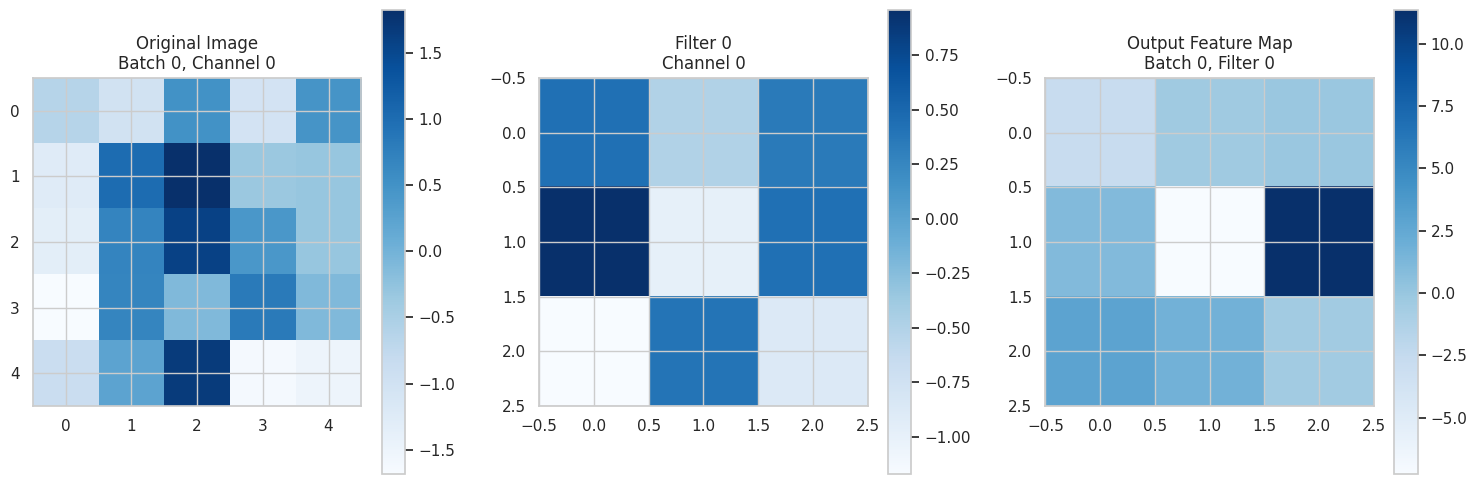

In [16]:
# Manual implementation of convolution using for loops

# 1. Extract patches from the image
patches = torch.zeros(batch_size, in_channels, height-kernel_size+1, width-kernel_size+1, 
                      kernel_size, kernel_size)

# Fill the patches
for i in range(height-kernel_size+1):
    for j in range(width-kernel_size+1):
        patches[:, :, i, j] = images[:, :, i:i+kernel_size, j:j+kernel_size]

print("Patches shape:", patches.shape)

# 2. Implement manual convolution using loops
manual_output = torch.zeros_like(conv_output_trad)
for b in range(batch_size):
    for o in range(out_channels):
        for i in range(height-kernel_size+1):
            for j in range(width-kernel_size+1):
                for c in range(in_channels):
                    for kh in range(kernel_size):
                        for kw in range(kernel_size):
                            manual_output[b, o, i, j] += images[b, c, i+kh, j+kw] * kernels[o, c, kh, kw]

print("Manual output shape:", manual_output.shape)
print("Manual and traditional results match?", torch.allclose(conv_output_trad, manual_output, rtol=1e-5))

# Visualize one filter and its output
filter_idx = 0
plt.figure(figsize=(15, 5))

# Original image (first channel)
plt.subplot(131)
plt.imshow(images[0, 0].detach().numpy(), cmap='Blues')
plt.title(f'Original Image\nBatch 0, Channel 0')
plt.colorbar()

# Filter
plt.subplot(132)
plt.imshow(kernels[filter_idx, 0].detach().numpy(), cmap='Blues')
plt.title(f'Filter {filter_idx}\nChannel 0')
plt.colorbar()

# Output feature map
plt.subplot(133)
plt.imshow(conv_output_trad[0, filter_idx].detach().numpy(), cmap='Blues')
plt.title(f'Output Feature Map\nBatch 0, Filter {filter_idx}')
plt.colorbar()

plt.tight_layout()
plt.show()


## Summary

In this notebook, we've explored advanced tensor operations using Einstein notation:

1. **Advanced Tensor Contractions**: We've seen how to contract higher-order tensors along multiple dimensions.

2. **Batch Operations**: We've used einsum to efficiently process batches of data at once.

3. **Tensor Reshaping**: We've demonstrated how einsum can combine reshaping with computation.

4. **Performance Optimization**: We've benchmarked einsum against traditional operations.

5. **Real-World Applications**: We've implemented attention mechanisms and convolutions using einsum.

Einstein notation provides a powerful, concise, and sometimes more efficient way to express complex tensor operations. The ability to clearly specify which dimensions are being operated on makes code easier to read once you're familiar with the notation.

In the next notebook, we'll explore practical applications of tensor operations and Einstein notation in various fields such as machine learning, physics, and computer graphics.